# ADS Final Project

## Preliminary EDA

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import dmba
from pathlib import Path

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
Retail_df = pd.read_csv('Online_Retail.csv')
Retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
304889,563614,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,240,8/18/2011 8:51,3.39,12415.0,Australia
232914,557389,21314,SMALL GLASS HEART TRINKET POT,1,6/20/2011 11:03,2.10,15921.0,United Kingdom
515973,579832,21181,PLEASE ONE PERSON METAL SIGN,12,11/30/2011 15:58,2.10,17434.0,United Kingdom
458137,575760,23581,JUMBO BAG PAISLEY PARK,14,11/11/2011 10:50,2.08,15965.0,United Kingdom
209283,555201,22128,PARTY CONES CANDY ASSORTED,12,6/1/2011 12:10,1.25,16969.0,United Kingdom


In [13]:
Retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
Retail_df.shape

(541909, 8)

In [4]:
Retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
Retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Maximum and minimum unit price/quantity is extreme there is probably a corrupt record

In [24]:
# look for the outlier record:
outlier_rows = Retail_df['Quantity']== -80995
outlier=Retail_df[outlier_rows]
outlier

outlier_rows2 = Retail_df['Quantity']== 80995
outlier2=Retail_df[outlier_rows2]

outlier_rows3 = Retail_df['UnitPrice']== 38970
outlier3=Retail_df[outlier_rows3]

outlier_rows4 = Retail_df['UnitPrice']== -11062.06
outlier4=Retail_df[outlier_rows4]


In [25]:
outlier4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


-----

### Temporary Removal of Large Orders to View Common Orders Made Distributions

In [61]:
Retail_clean = Retail_df[Retail_df['UnitPrice'].between(Retail_df['UnitPrice'].quantile(.25), 
                                                                Retail_df['UnitPrice'].quantile(.75))] 

In [62]:
Retail_clean_df = Retail_clean[Retail_clean['Quantity'].between(Retail_clean['Quantity'].quantile(.25), 
                                                       Retail_clean['Quantity'].quantile(.75))] 

In [64]:
Retail_clean_df.shape

(223391, 8)

In [56]:
Retail_clean_df.describe()

,Quantity,UnitPrice,CustomerID
count,220165.000000,220165.000000,152771.000000
mean,3.439811,2.900183,15406.978857
std,2.706716,1.042228,1692.378366
min,1.000000,1.630000,12347.000000
25%,1.000000,2.080000,14096.000000
50%,2.000000,2.550000,15358.000000
75%,6.000000,3.750000,16907.000000
max,10.000000,4.950000,18287.000000


array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>, <AxesSubplot:>]],
      dtype=object)

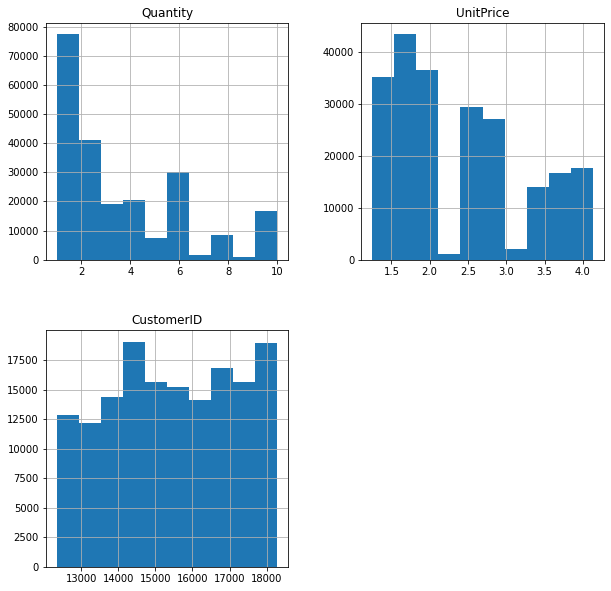

In [65]:
Retail_clean_df.hist(figsize=[10,10])


----

### Remove Irrelevant and Unrealistic Records:

In [5]:
unreal_rows1 = Retail_df[Retail_df['Quantity'] <= 0].index
#unreal_rows2 = Retail_df[Retail_df['Price'] <= 0].index

Retail_df_pre = Retail_df.drop(index=unreal_rows1)
unreal_rows2 = Retail_df_pre[Retail_df_pre['UnitPrice'] <= 0].index

Retail_df_pre2 = Retail_df_pre.drop(index=unreal_rows2)
unreal_rows3 = Retail_df_pre2[Retail_df_pre2['Quantity'] >= 80000].index

Retail_df_pre3 = Retail_df_pre2.drop(index=unreal_rows3)
unreal_rows4 = Retail_df_pre3[(Retail_df_pre3['StockCode'] == 'AMAZONFEE') |
                             (Retail_df_pre3['StockCode'] == 'DOT') |
                             (Retail_df_pre3['StockCode'] == 'M') |
                             (Retail_df_pre3['StockCode'] == 'B') |
                             (Retail_df_pre3['StockCode'] == 'POST')].index

Retail_df_pre4 = Retail_df_pre3.drop(index=unreal_rows4)



In [6]:
unreal_rows4 = Retail_df_pre4['Quantity'] >= 1000
Retail_df_pre4[unreal_rows4]



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,EIRE
16435,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
521375,580363,23582,VINTAGE DOILY JUMBO BAG RED,1500,12/2/2011 16:32,1.79,13868.0,United Kingdom
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,United Kingdom
534952,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/2011 15:16,1.79,14646.0,Netherlands
540070,581458,22197,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,United Kingdom


In [27]:
Retail_df_hist.describe()

,Quantity,UnitPrice,CustomerID
count,527944.000000,527944.000000,396481.000000
mean,10.270070,3.276816,15301.442505
std,37.727013,4.267975,1709.759660
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13975.000000
50%,3.000000,2.080000,15159.000000
75%,11.000000,4.130000,16801.000000
max,4800.000000,295.000000,18287.000000


In [97]:
Retail_df_pre4.shape

(527947, 8)

In [100]:
Retail_TimeSeries_df=Retail_df_pre4.copy()

In [16]:
finding_row = Retail_df_pre4['Quantity'] == 74215

In [17]:
Retail_df_pre4[finding_row]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom


In [20]:
finding_row2 = Retail_df_pre4['UnitPrice'] == 649.5

In [21]:
Retail_df_pre4[finding_row2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.5,15098.0,United Kingdom
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098.0,United Kingdom


In [41]:
Retail_df_hist = Retail_df_pre4.drop(index=61619)
#Retail_df_large_orders = Retail_df_pre4.drop(index=rows_small_orders)

In [125]:
rows_medlarge_orders = Retail_df_hist['Quantity'] >= 100
Retail_df_medlarge_orders = Retail_df_hist[rows_medlarge_orders]
Retail_df_medlarge_orders.shape

(6647, 8)

In [42]:
rows_large_orders = Retail_df_hist['Quantity'] >= 1000
Retail_df_large_orders = Retail_df_hist[rows_large_orders]

Text(0.5, 0.98, 'Histograms for orders over 1000')

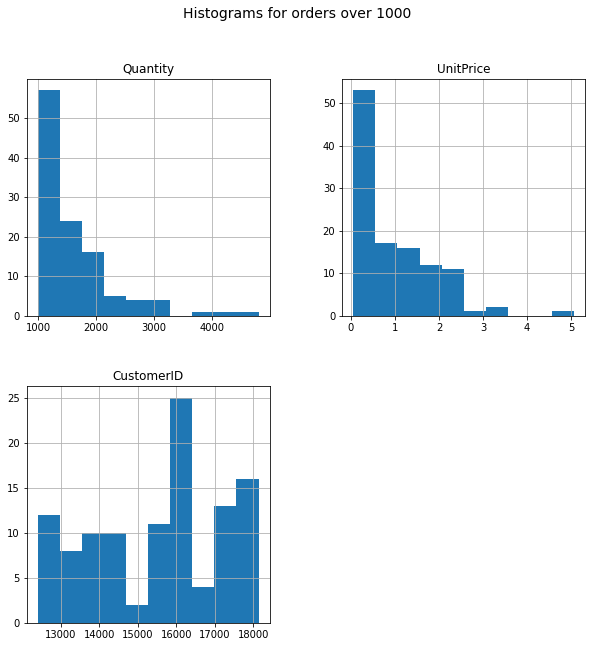

In [50]:
Retail_df_large_orders.hist(figsize=[10,10])
plt.suptitle("Histograms for orders over 1000", fontsize=14)


In [51]:
Retail_df_large_orders.to_csv('Retail_df_large_orders.csv')

In [124]:
Retail_df_large_orders.shape

(113, 8)

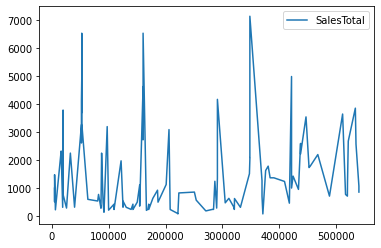

In [127]:
from pandas import read_csv
series_time_retail = read_csv('Retail_df_large_orders.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series_time_retail['SalesTotal']=series_time_retail['Quantity']*series_time_retail['UnitPrice']
series_time_retail.drop(columns=['InvoiceNo', 'CustomerID','UnitPrice','Quantity'],inplace=True)

series_time_retail.plot()
plt.show()

In [80]:
series_time_retail.tail(20)

,StockCode,Description,InvoiceDate,Country,SalesTotal
InvoiceDate,,,,,
2011-10-27 12:11:00,23084,RABBIT NIGHT LIGHT,10/27/2011 12:11,Netherlands,4992.00
2011-10-27 12:26:00,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,10/27/2011 12:26,United Kingdom,1008.00
2011-10-28 12:32:00,22197,POPCORN HOLDER,10/28/2011 12:32,United Kingdom,1434.24
2011-11-02 11:24:00,16014,SMALL CHINESE STYLE SCISSOR,11/2/2011 11:24,United Kingdom,960.00
2011-11-03 15:47:00,22086,PAPER CHAIN KIT 50'S CHRISTMAS,11/3/2011 15:47,United Kingdom,2601.00
2011-11-03 15:47:00,21915,RED HARMONICA IN BOX,11/3/2011 15:47,United Kingdom,2226.00
2011-11-07 17:42:00,22197,POPCORN HOLDER,11/7/2011 17:42,United Kingdom,3549.00
2011-11-09 13:56:00,84879,ASSORTED COLOUR BIRD ORNAMENT,11/9/2011 13:56,United Kingdom,1740.00
2011-11-10 11:55:00,85099B,JUMBO BAG RED RETROSPOT,11/10/2011 11:55,United Kingdom,1790.00


Observe relationship between sales and unit price - are there more sales if the price is low or vice versa?

In [86]:
series_time_retail2 = read_csv('Retail_df_large_orders.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series_time_retail2['SalesTotal']=series_time_retail2['Quantity']*series_time_retail2['UnitPrice']

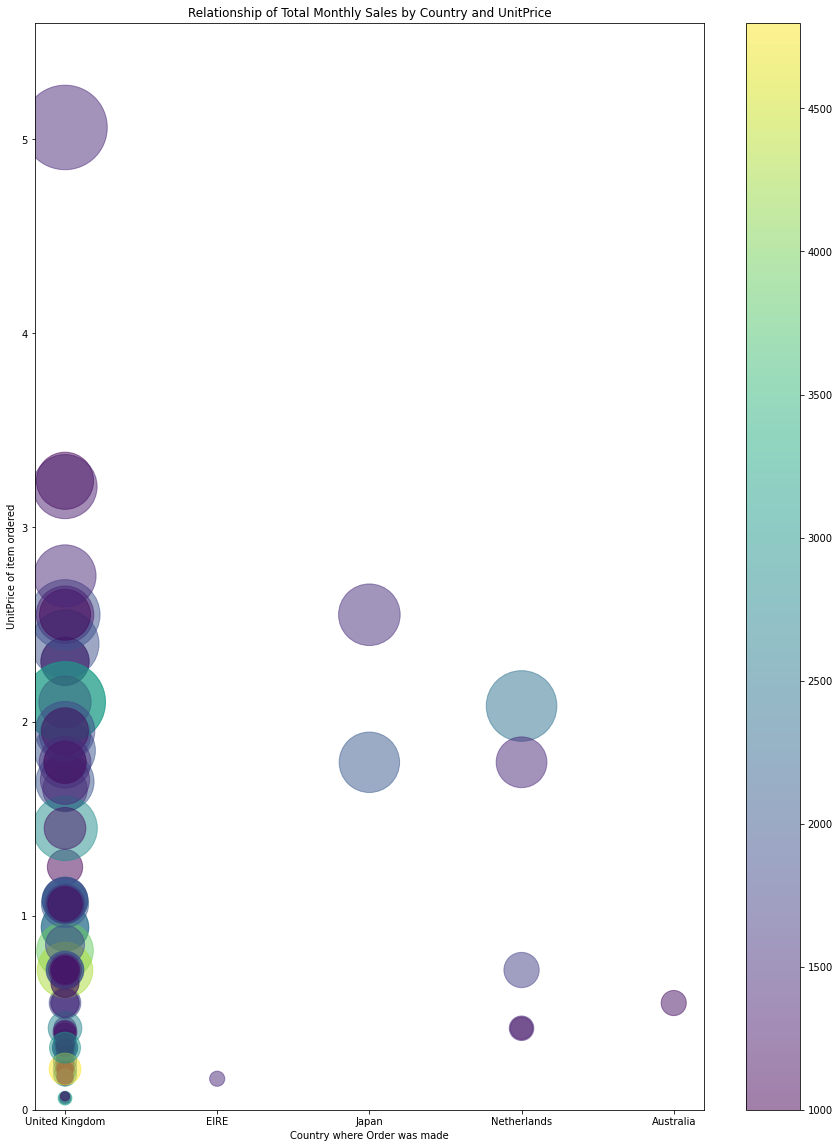

In [123]:
plt.figure(figsize=(15,20))
plt.scatter(series_time_retail2['Country'], series_time_retail2['UnitPrice'], 
            s=series_time_retail2['SalesTotal'], c=series_time_retail2['Quantity'], alpha=0.5
#           ,main='Scatter Plot Relationship of Total Monthly Sales by Country and UnitPrice'
           )
#plt.title('Relationship of Total Monthly Sales by Country and UnitPrice')
plt.gca().update(dict(title='Relationship of Total Monthly Sales by Country and UnitPrice', 
                      xlabel='Country where Order was made', ylabel='UnitPrice of item ordered', ylim=(0,5.6)))
plt.colorbar()
plt.show()

* Most orders have a unit price below 3.5
* Most orders originate from the UK, which is where the company is based
* Quantity lies in a certain range for most orders (purple/blue) with just a few yellow/green from UK
* Total Sales are small for EIRE and larger sales come from the higher priced items

Plot monthly orders with a different line color for each country:

Parse the InvoiceDate column

In [62]:
import datetime
from dateutil.parser import parse
#datetime.datetime.strptime('Mon Feb 15 2010', '%a %b %d %Y').strftime('%d/%m/%Y')
#'15/02/2010'

In [239]:
series_time_retail33 = read_csv('Retail_df_large_orders.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series_time_retail33['SalesTotal']=series_time_retail33['Quantity']*series_time_retail33['UnitPrice']

In [263]:
series_time_retail3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesTotal
InvoiceDate,,,,,,,,,
2010-12-02 16:48:00,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom,1003.20
2010-12-02 17:38:00,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom,518.40
2010-12-02 17:38:00,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom,1484.00
2010-12-03 11:48:00,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,EIRE,230.40
2010-12-07 16:43:00,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom,2328.48
...,...,...,...,...,...,...,...,...,...
2011-12-02 16:32:00,580363,23582,VINTAGE DOILY JUMBO BAG RED,1500,12/2/2011 16:32,1.79,13868.0,United Kingdom,2685.00
2011-12-07 12:20:00,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,United Kingdom,3861.00
2011-12-07 15:16:00,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/2011 15:16,1.79,14646.0,Netherlands,2577.60


In [265]:
#series_time_retail3['InvoiceDate']=series_time_retail3['InvoiceDate'].astype('string')
series_time_retail33.index = pd.to_datetime(series_time_retail33['InvoiceDate'],format='%m/%d/%Y %H:%M')
##series_monthly_time_retail = series_time_retail.groupby(by=[series_time_retail.index.month, series_time_retail.index.year]).sum()
series_monthly_time_retail3 = series_time_retail3.groupby(by=[series_time_retail33.index.year, series_time_retail33.index.month]).sum()
#series_monthly_time_retail3 = series_time_retail33.groupby(series_time_retail33.index.year, series_time_retail33.index.month).sum()




In [266]:
series_monthly_time_retail3

InvoiceNo  Quantity  UnitPrice  CustomerID  \
InvoiceDate InvoiceDate                                               
2010        12             6453640     18866      11.35    189837.0   
2011        1              4326900     13434      17.85    129992.0   
            2              5981955     20094       4.91    180134.0   
            3              3827994      9448       3.21    106261.0   
            4              7701703     20392      11.75    221867.0   
            5              3322127     12702       2.78     91456.0   
            6              1669018      4315       0.68     44326.0   
            7              3364285     10146       1.69     82468.0   
            8              3942020     10988       4.77    108080.0   
            9              6238890     16186      13.67    175381.0   
            10             6283263     19748      10.22    168618.0   
            11             5182114     14310      13.58    109638.0   
            12             4645919     10364      10.20    126790.0   

                         SalesTotal  
InvoiceDate InvoiceDate              
2010        12             15647.82  
2011        1              29091.82  
            2               9600.84  
            3               4082.72  
            4              21321.08  
            5               6547.42  
            6               1013.25  
            7               2365.56  
            8               8546.32  
            9              20509.80  
            10             16774.08  
            11             19441.10  
            12             13754.80

In [231]:
series_monthly_time_retail3

InvoiceNo  Quantity  UnitPrice  CustomerID  \
InvoiceDate InvoiceDate                                               
2010        12             6453640     18866      11.35    189837.0   
2011        1              4326900     13434      17.85    129992.0   
            2              5981955     20094       4.91    180134.0   
            3              3827994      9448       3.21    106261.0   
            4              7701703     20392      11.75    221867.0   
            5              3322127     12702       2.78     91456.0   
            6              1669018      4315       0.68     44326.0   
            7              3364285     10146       1.69     82468.0   
            8              3942020     10988       4.77    108080.0   
            9              6238890     16186      13.67    175381.0   
            10             6283263     19748      10.22    168618.0   
            11             5182114     14310      13.58    109638.0   
            12             4645919     10364      10.20    126790.0   

                         SalesTotal  
InvoiceDate InvoiceDate              
2010        12             15647.82  
2011        1              29091.82  
            2               9600.84  
            3               4082.72  
            4              21321.08  
            5               6547.42  
            6               1013.25  
            7               2365.56  
            8               8546.32  
            9              20509.80  
            10             16774.08  
            11             19441.10  
            12             13754.80

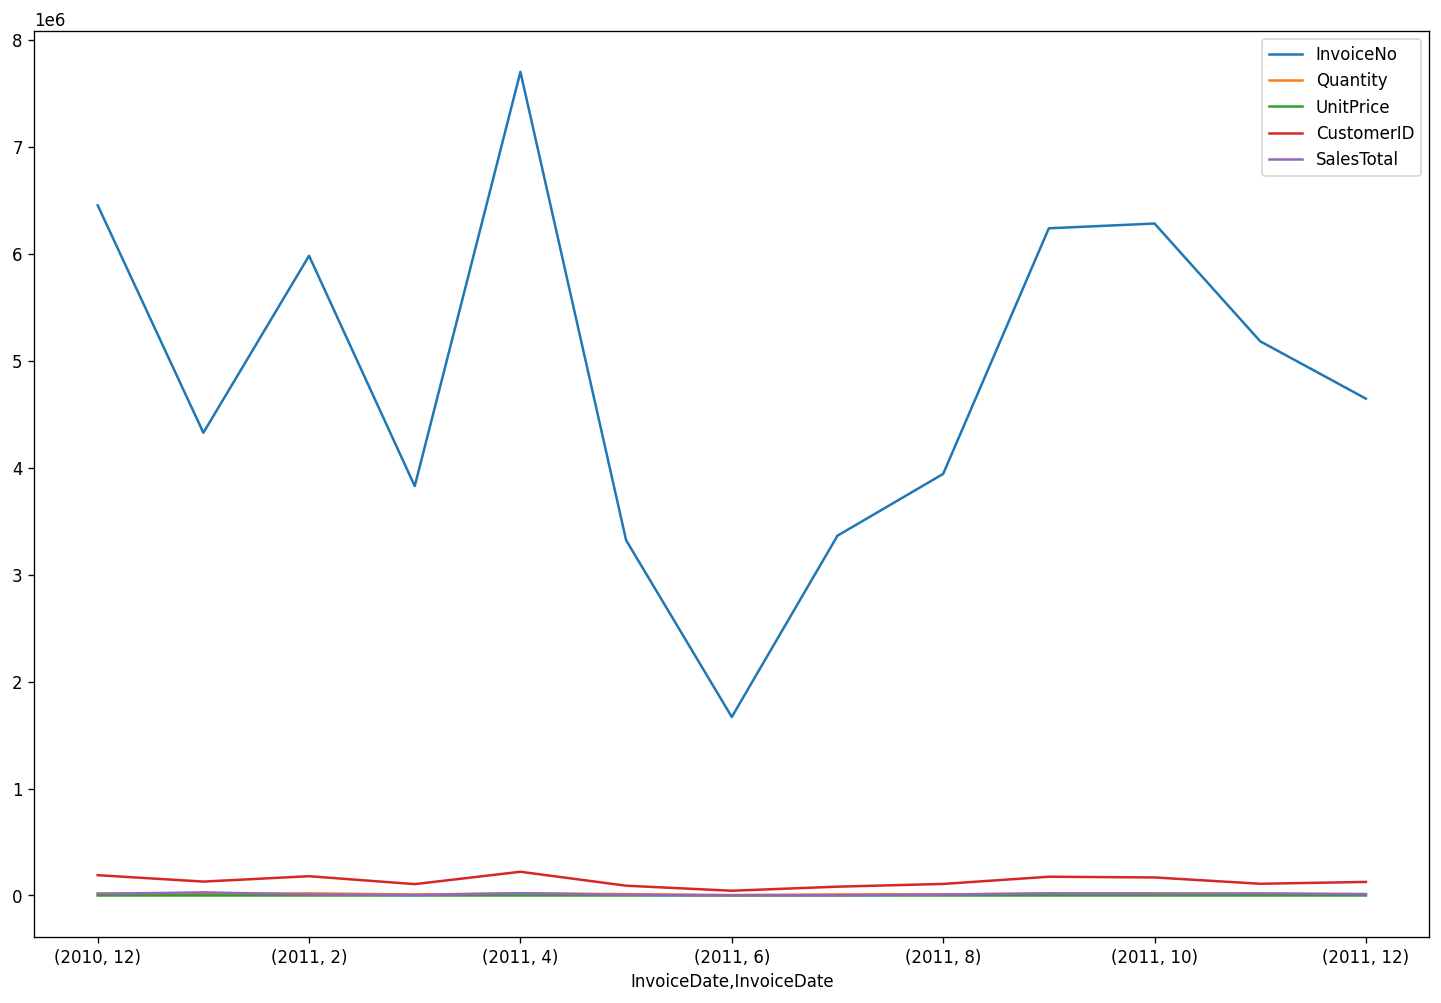

In [268]:
series_monthly_time_retail3.plot(figsize=(15,10))
plt.show()

----

Examples from readings:

## Module 4 ARIMA approach:

In [293]:
from numpy import log
from statsmodels.tsa.stattools import adfuller

result = adfuller(values_sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.308185
p-value: 0.169342


Null Hypothesis: series is non-stationary
p-value is > 0.05 so we cannot reject the null hypothesis.

Therefore, the series is non-stationary.

In [281]:
values_sales=DataFrame(series_monthly_time_retail3.SalesTotal.values)

In [290]:
values_sales

,0
0,15647.82
1,29091.82
2,9600.84
3,4082.72
4,21321.08
5,6547.42
6,1013.25
7,2365.56
8,8546.32
9,20509.80


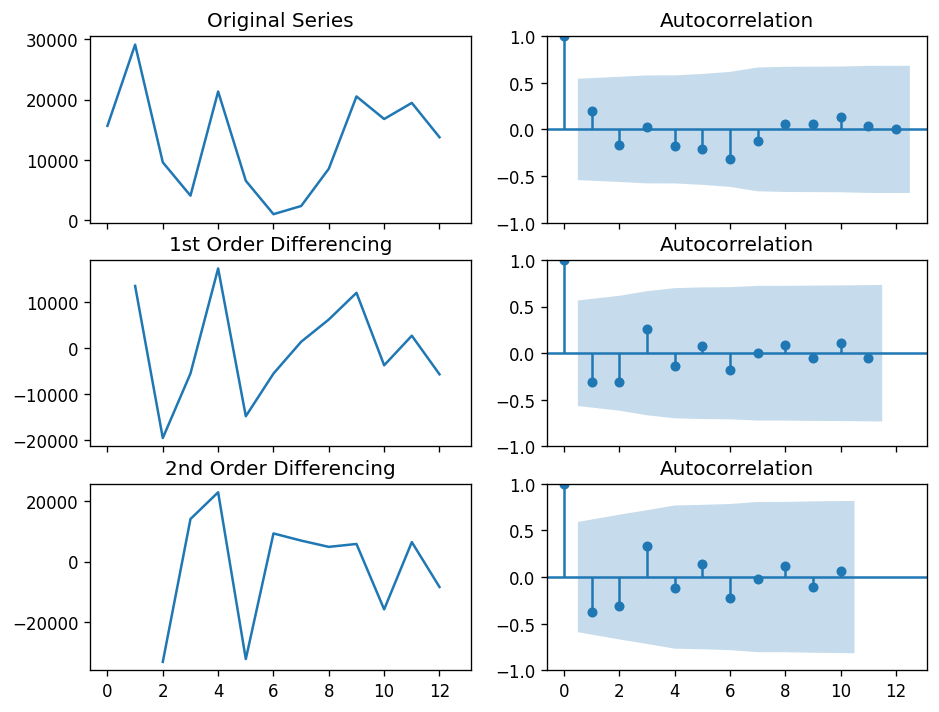

In [289]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Import data

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(values_sales); axes[0, 0].set_title('Original Series')


plot_acf(values_sales, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(values_sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(values_sales.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(values_sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(values_sales.diff().diff().dropna(), ax=axes[2, 1])
plt.show()


DIfferencing first order is enough to reach stationarity

In [294]:
result = adfuller(values_sales.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.442813
p-value: 0.000249


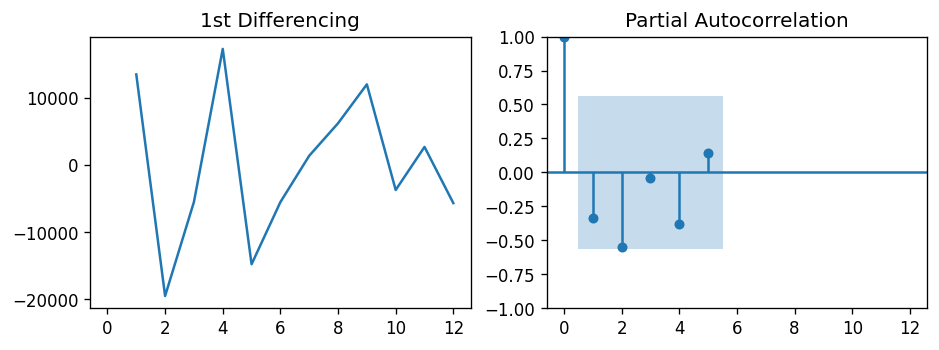

In [298]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(values_sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(values_sales.diff().dropna(), lags=5, ax=axes[1])
plt.show()

In [364]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
# 1,1,2 ARIMA Model
model = ARIMA(values_sales, order=(2,2,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   13
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -119.392
Date:                Fri, 18 Nov 2022   AIC                            244.785
Time:                        14:51:13   BIC                            245.978
Sample:                             0   HQIC                           244.032
                                 - 13                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6059      0.250     -2.425      0.015      -1.096      -0.116
ar.L2         -0.6559      0.161     -4.078      0.000      -0.971      -0.341
sigma2       1.02e+08   2.45e-10   4.17e+17      0.0

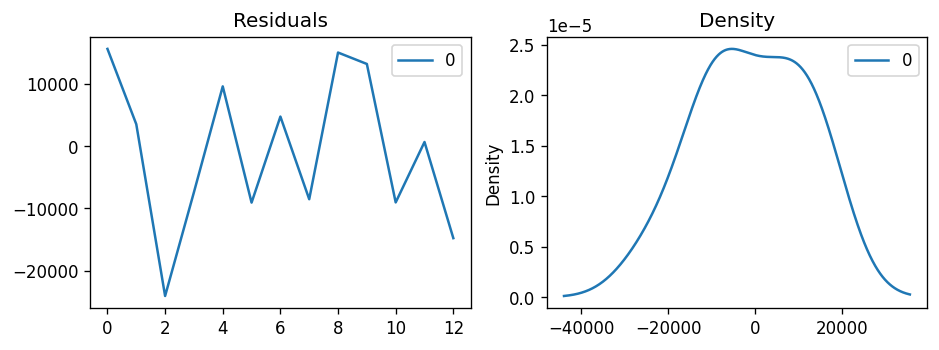

In [365]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

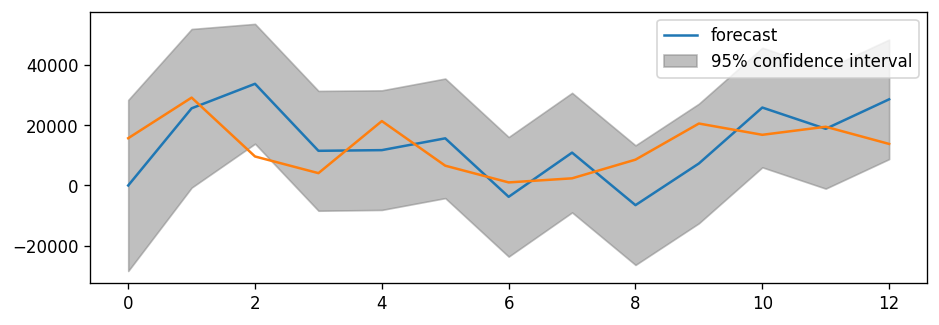

In [366]:
# Actual vs Fitted
plot_predict(model_fit)
plt.plot(values_sales)
plt.show()

validating the ARIMA model:

In [ ]:
from statsmodels.tsa.stattools import acf
# Create Training and Test
train = df.value[:85]
test = df.value[85:]

In [ ]:
model = ARIMA(train, order=(1, 1, 1)) 
fitted = model.fit(disp=-1) 
# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05) # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [ ]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
 test='adf', # use adftest to find optimal 'd'
 max_p=3, max_q=3, # maximum p and q
 m=1, # frequency of series
 d=None, # let model determine 'd'
 seasonal=False, # No Seasonality
 start_P=0, 
 D=0, 
 trace=True,
 error_action='ignore',
 suppress_warnings=True, 
 stepwise=True)
print(model.summary())                     

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
 lower_series, 
 upper_series, 
 color='k', alpha=.15)
plt.title("Final Forecast of WWW Usage")
plt.show()

SARIMA

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)
# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [ ]:
# !pip3 install pyramid-arima
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
 test='adf',
 max_p=3, max_q=3, m=12,
 start_P=0, seasonal=True,
 d=None, D=1, trace=True,
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)
smodel.summary()

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
 lower_series, 
 upper_series, 
 color='k', alpha=.15)
plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()


SARIMAX

In [ ]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:], # 3 years
 model='multiplicative', 
 extrapolate_trend='freq')
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month
# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index # reassign the index.


In [ ]:
import pmdarima as pm
# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
 start_p=1, start_q=1,
 test='adf',
 max_p=3, max_q=3, m=12,
 start_P=0, seasonal=True,
 d=None, D=1, trace=True,
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)
sxmodel.summary()

In [ ]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
 exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
 return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)
# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
 lower_series, 
 upper_series, 
 color='k', alpha=.15)
plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()


Test MSE: 81305676.872


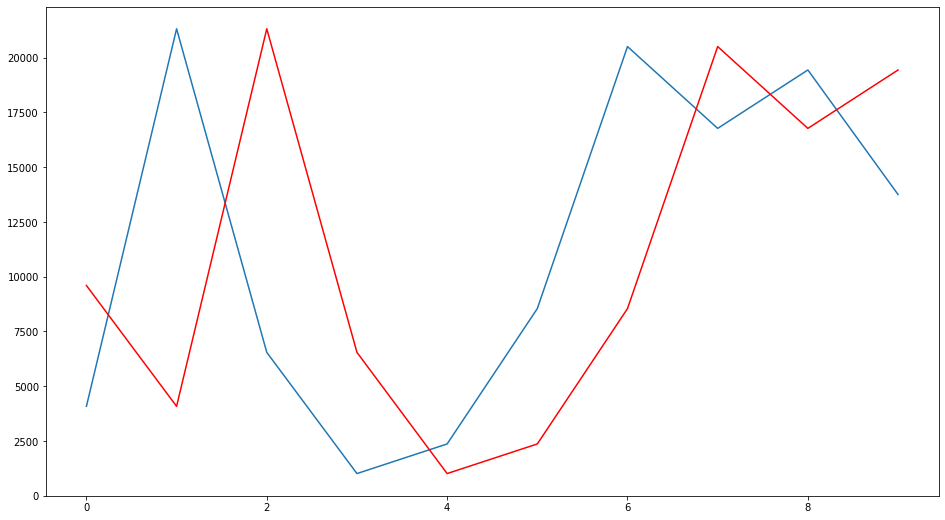

In [176]:
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

# create lagged dataset
values = DataFrame(series_monthly_time_retail.SalesTotal)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

# split into train and test sets
X2 = dataframe.values
train, test = X2[1:len(X2)-10], X2[len(X2)-10:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)

test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()


In [250]:
series_monthly_time_retail

series_time_retail.index = pd.to_datetime(series_time_retail['InvoiceDate'],format='%m/%d/%Y %H:%M')
#series_monthly_time_retail = series_time_retail.groupby(by=[series_time_retail.index.month, series_time_retail.index.year]).sum()
series_monthly_time_retail = series_time_retail.groupby(by=[series_time_retail.index.year, series_time_retail.index.month]).sum()


In [253]:
series_monthly_time_retail

SalesTotal
InvoiceDate InvoiceDate            
2010        12             15647.82
2011        1              29091.82
            2               9600.84
            3               4082.72
            4              21321.08
            5               6547.42
            6               1013.25
            7               2365.56
            8               8546.32
            9              20509.80
            10             16774.08
            11             19441.10
            12             13754.80

In [254]:
series_monthly_time_retail.columns = series_monthly_time_retail.columns.to_flat_index()

AttributeError: 'DataFrame' object has no attribute 'InvoiceDate'

In [212]:
from statsmodels.tsa.ar_model import AutoReg
from math import sqrt

# split dataset
X3 = series_monthly_time_retail.SalesTotal
train3, test3 = X3[0:len(X3)-3], X3[len(X3)-3:]

# train autoregression
model3 = AutoReg(train3, lags=3)
model_fit3 = model3.fit()
print('Coefficients: %s' % model_fit3.params)




Coefficients: const            10815.757760
SalesTotal.L1        0.012140
SalesTotal.L2       -0.372338
SalesTotal.L3        0.178548
dtype: float64


C:\Users\Susy\anaconda3\envs\humans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [213]:
# make predictions
predictions3 = model_fit3.predict(start=len(train3), end=len(train3)+len(test3)-1, dynamic=False)


C:\Users\Susy\anaconda3\envs\humans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [220]:
train3

InvoiceDate  InvoiceDate
2010         12             15647.82
2011         1              29091.82
             2               9600.84
             3               4082.72
             4              21321.08
             5               6547.42
             6               1013.25
             7               2365.56
             8               8546.32
             9              20509.80
Name: SalesTotal, dtype: float64

In [219]:
test3

InvoiceDate  InvoiceDate
2011         10             16774.08
             11             19441.10
             12             13754.80
Name: SalesTotal, dtype: float64

In [217]:
predictions3[10]

8304.99902023769

predicted=8304.999020, expected=16774.080000
predicted=4805.927297, expected=19441.100000
predicted=11443.809491, expected=13754.800000
Test RMSE: 9853.160


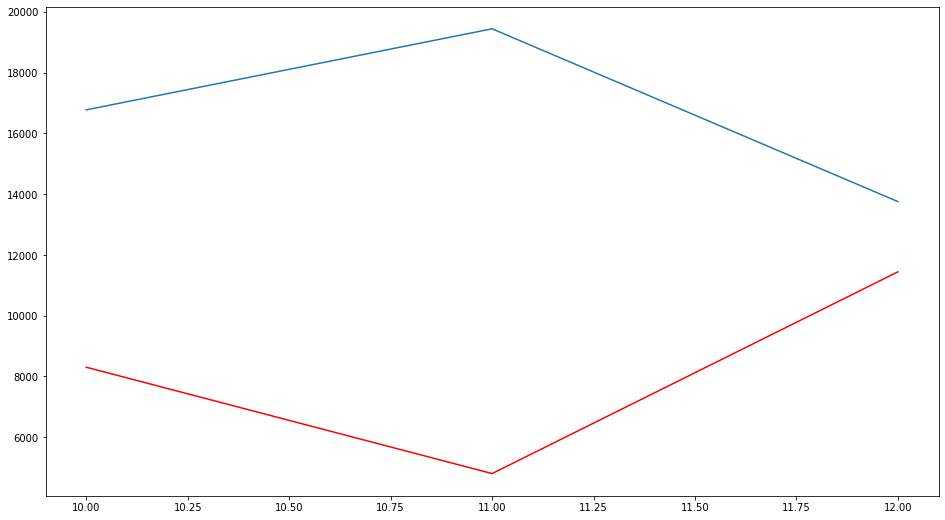

In [222]:
for i3 in [10,11,12]:
    print('predicted=%f, expected=%f' % (predictions3[i3], test3[2011][i3]))
rmse3 = sqrt(mean_squared_error(test3, predictions3))
print('Test RMSE: %.3f' % rmse3)

# plot results
plt.plot(test3[2011])
plt.plot(predictions3, color='red')
plt.show()

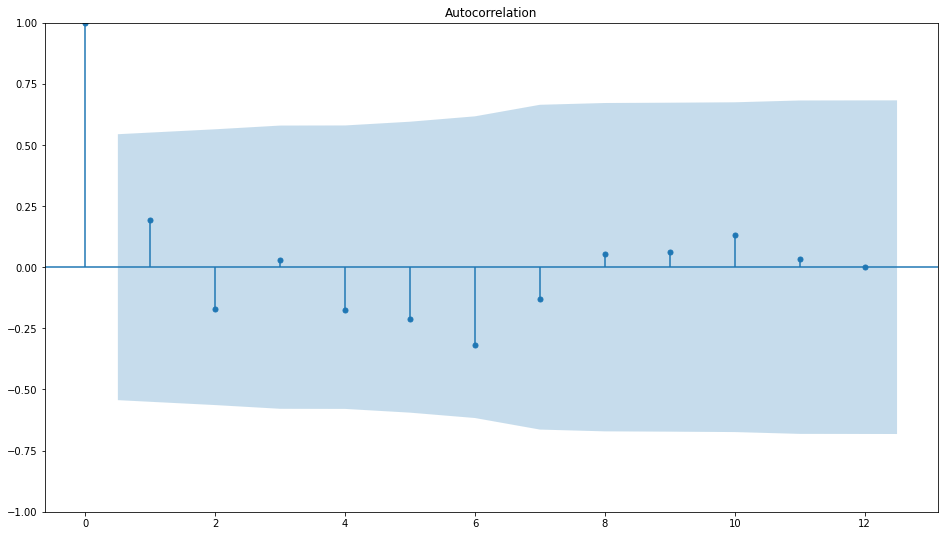

In [174]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series_monthly_time_retail, lags=12)
plt.show()

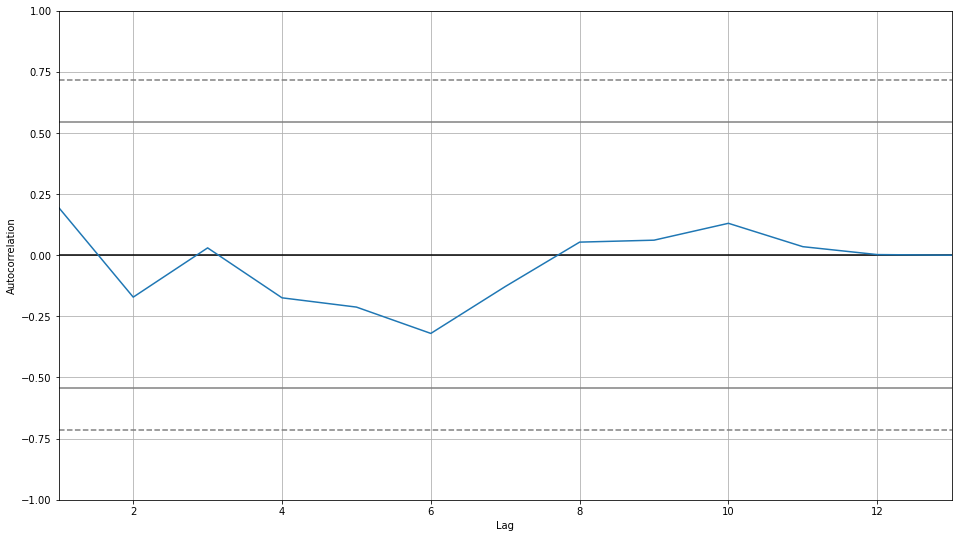

In [172]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series_monthly_time_retail)
plt.show()

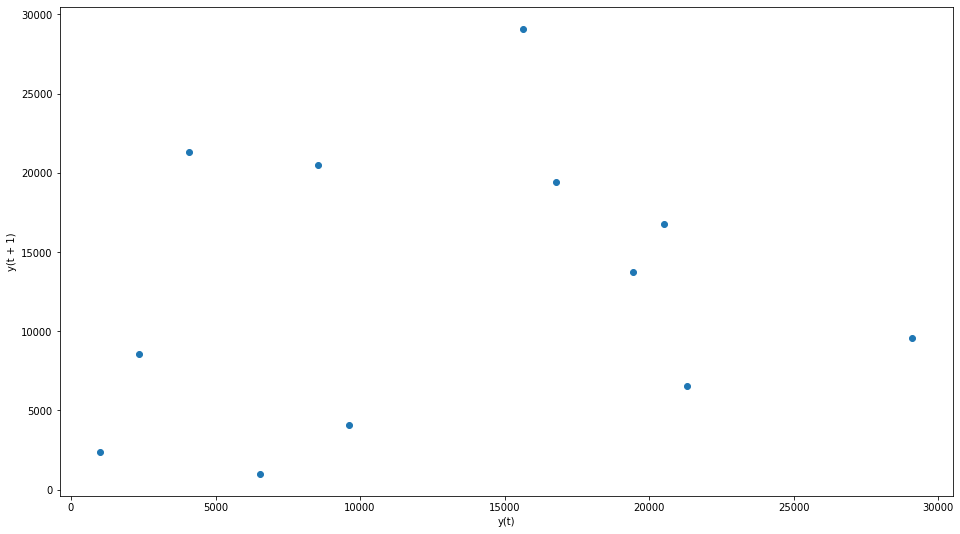

In [170]:

from pandas.plotting import lag_plot
lag_plot(series_monthly_time_retail)
plt.show()

In [143]:
from sklearn.model_selection import ParameterGrid

from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [128]:
series_monthly_time_retail.shape

(13, 1)

In [167]:
series_monthly_time_retail.head()

SalesTotal
InvoiceDate InvoiceDate            
2010        12             15647.82
2011        1              29091.82
            2               9600.84
            3               4082.72
            4              21321.08

In [168]:
ts = series_monthly_time_retail.set_index(['InvoiceDate']['InvoiceDate'])

TypeError: list indices must be integers or slices, not str

In [137]:
X = series_monthly_time_retail['SalesTotal']

trainX = X.iloc[-12:]
testX = X.iloc[:-12]

In [138]:
testX

InvoiceDate  InvoiceDate
2010         12             15647.82
Name: SalesTotal, dtype: float64

In [131]:
def mean_absolute_percentage_error_func(y_true, y_pred):
    '''
    Calculate the mean absolute percentage error as a metric for evaluation
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        Mean absolute percentage error 
    '''    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [147]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    '''
    Calculate the following evaluation metrics:
        - MSE
        - MAE
        - RMSE
        - MAPE
        - R²
    
    Args:
        y_true (float64): Y values for the dependent variable (test part), numpy array of floats 
        y_pred (float64): Predicted values for the dependen variable (test parrt), numpy array of floats
    
    Returns:
        MSE, MAE, RMSE, MAPE and R² 
    '''    
    print('Evaluation metric results: ')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error_func(y_true, y_pred)}')
    print(f'R2 is : {r2_score(y_true, y_pred)}',end='\n\n')
#
# 4 Simple Exponential Smoothing
# Simple Exponential Smoothing is one of the minimal models of the exponential smoothing algorithms. This method can be used to predict series that do not have trends or seasonality.

# Assume that a time series has the following:

# Level
# No trends
# No seasonality
# Noise
# 4.1 Searching for best parameters for SES
# In the Simple Exponential Smoothing function we have the following parameter that we can set:

#smooting_level(float, optional)
# To find out which value fits best for this we perform a for-loop.



In [148]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    print(f'Fitting for smoothing level= {i}')
    fit_v = SimpleExpSmoothing(np.asarray(trainX)).fit(i)
    fcst_pred_v= fit_v.forecast(len(testX))   
    timeseries_evaluation_metrics_func(testX, fcst_pred_v)

Fitting for smoothing level= 0
Evaluation metric results: 
MSE is : 8373769.350719552
MAE is : 2893.746594074808
RMSE is : 2893.746594074808
MAPE is : 18.492969589852184
R2 is : nan

Fitting for smoothing level= 0.1
Evaluation metric results: 
MSE is : 6778796.182967856
MAE is : 2603.6121414234985
RMSE is : 2603.6121414234985
MAPE is : 16.638817045591644
R2 is : nan

Fitting for smoothing level= 0.2
Evaluation metric results: 
MSE is : 3500559.276786317
MAE is : 1870.9781604247328
RMSE is : 1870.9781604247328
MAPE is : 11.95679756301346
R2 is : nan

Fitting for smoothing level= 0.3
Evaluation metric results: 
MSE is : 1092876.586953291
MAE is : 1045.4073784670218
RMSE is : 1045.4073784670218
MAPE is : 6.680849974418301
R2 is : nan

Fitting for smoothing level= 0.4
Evaluation metric results: 
MSE is : 177348.24519251936
MAE is : 421.1273503259072
RMSE is : 421.1273503259072
MAPE is : 2.691284474935852
R2 is : nan

Fitting for smoothing level= 0.5
Evaluation metric results: 
MSE is : 173

ideal smoothing value is 0.5

In [149]:
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90,1]:
    fit_v = SimpleExpSmoothing(np.asarray(trainX)).fit(i)
    fcst_pred_v= fit_v.forecast(len(testX))   
    rmse = np.sqrt(mean_squared_error(testX, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)

In [150]:
SES = SimpleExpSmoothing(np.asarray(trainX))
fit_SES = SES.fit(smoothing_level = .5, optimized=False)

fcst_gs_pred = fit_SES.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_gs_pred)


Evaluation metric results: 
MSE is : 16763.40894975929
MAE is : 129.4735839843761
RMSE is : 129.4735839843761
MAPE is : 0.8274225034821215
R2 is : nan



In [151]:
SES = SimpleExpSmoothing(np.asarray(trainX))
fit_SES_auto = SES.fit(optimized= True, use_brute = True)

fcst_auto_pred = fit_SES_auto.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_auto_pred)

Evaluation metric results: 
MSE is : 523240.73315811984
MAE is : 723.3538091128848
RMSE is : 723.3538091128848
MAPE is : 4.6227129984424975
R2 is : nan



C:\Users\Susy\anaconda3\envs\humans\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [152]:
fit_SES_auto.summary()

Dep. Variable:,endog,No. Observations:,12
Model:,SimpleExpSmoothing,SSE,1127447894.794
Optimized:,True,AIC,224.300
Trend:,None,BIC,225.270
Seasonal:,None,AICC,230.014
Seasonal Periods:,None,Date:,"Thu, 17 Nov 2022"
Box-Cox:,False,Time:,17:21:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7711770,alpha,True
initial_level,26288.337,l.0,True


In [153]:
fit_SES.summary()

Dep. Variable:,endog,No. Observations:,12
Model:,SimpleExpSmoothing,SSE,1188523101.010
Optimized:,False,AIC,224.933
Trend:,None,BIC,225.903
Seasonal:,None,AICC,230.647
Seasonal Periods:,None,Date:,"Thu, 17 Nov 2022"
Box-Cox:,False,Time:,17:22:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5000000,alpha,False
initial_level,29091.820,l.0,False


In [154]:
df_fcst_gs_pred = pd.DataFrame(fcst_gs_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(len(trainX), len(X))
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")

In [155]:
df_fcst_auto_pred = pd.DataFrame(fcst_auto_pred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(len(trainX), len(X))
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

ValueError: setting an array element with a sequence.

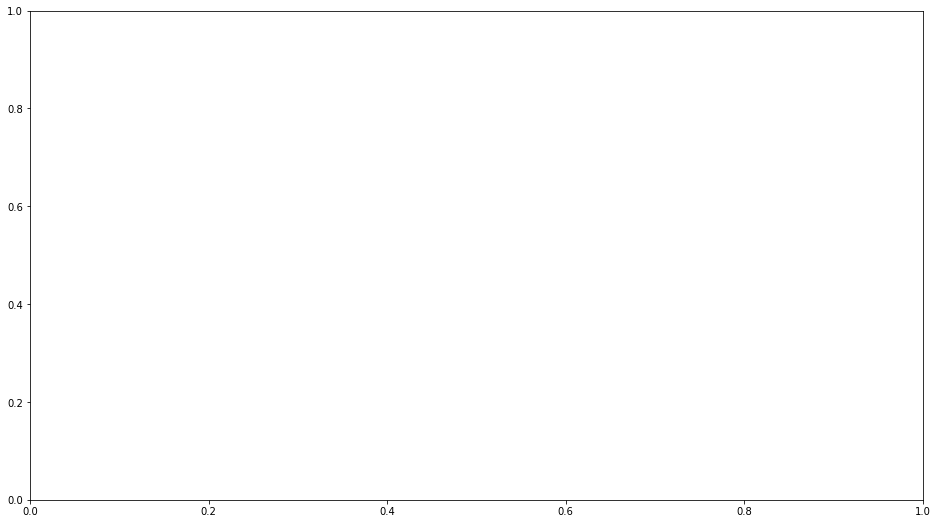

In [163]:
plt.plot(trainX)
plt.plot(testX)
plt.plot(df_fcst_gs_pred)
plt.plot(df_fcst_auto_pred)
plt.legend(['train', 'test', 'SES with custom grid search','SES with optimizer'])
plt.show()

ValueError: setting an array element with a sequence.

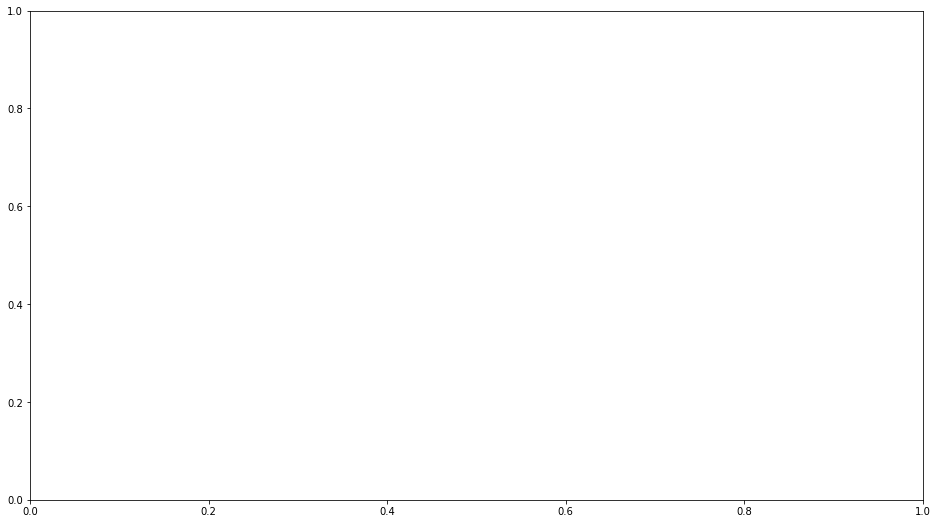

In [164]:
#plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainX)
#plt.plot(testX)
#plt.plot(df_fcst_gs_pred)
#plt.plot(df_fcst_auto_pred)
#plt.legend(['train', 'test', 'SES with custom grid search','SES with optimizer'])
#plt.show()

Double Exponential Smoothing:

In [ ]:
param_grid_DES = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 
                  'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
                  'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
                  'damped': [True, False]}
pg_DES = list(ParameterGrid(param_grid_DES))

In [ ]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])

for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    
    fit_Holt = Holt(trainX, damped=damped).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testX))
    
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testX, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testX, df_pred.Forecasted_result)

    df_results_DES = df_results_DES.append({'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope':damping_slope, 'damped':damped, 'RMSE':RMSE, 'R²':r2}, ignore_index=True)

In [ ]:
df_results_DES.sort_values(by=['RMSE','R²']).head(10)


In [ ]:
df_results_DES.to_csv('df_results_DES.csv')


In [ ]:
best_values_DES = df_results_DES.sort_values(by=['RMSE','R²']).head(1)
best_values_DES

In [ ]:
smoothing_level_value_DES = best_values_DES['smoothing_level'].iloc[0]
smoothing_slope_value_DES = best_values_DES['smoothing_slope'].iloc[0]
damping_slope_value_DES = best_values_DES['damping_slope'].iloc[0]
damped_setting_DES = best_values_DES['damped'].iloc[0]

print("smoothing_level_value_DES: ", smoothing_level_value_DES)
print("smoothing_slope_value_DES: ", smoothing_slope_value_DES)
print("damping_slope_value_DES: ", damping_slope_value_DES)
print("damped_setting_DES: ", damped_setting_DES)

In [ ]:
DES = Holt(trainX,damped=damped_setting_DES)
fit_Holt = DES.fit(smoothing_level=smoothing_level_value_DES, smoothing_slope=smoothing_slope_value_DES, 
                   damping_slope=damping_slope_value_DES ,optimized=False)

fcst_gs_pred_Holt = fit_Holt.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_gs_pred_Holt)

In [ ]:
DES = Holt(trainX)
fit_Holt_auto = DES.fit(optimized= True, use_brute = True)

fcst_auto_pred_Holt = fit_Holt_auto.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_auto_pred_Holt)


In [ ]:
fit_Holt_auto.summary()


In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainX, label='Train')
plt.plot(testX, label='Test')
plt.plot(fcst_gs_pred_Holt, label='Double Exponential Smoothing with custom grid search')
plt.plot(fcst_auto_pred_Holt, label='Double Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show()


Triple Exponential Smoothing:

In [ ]:
param_grid_TES = {'trend': ['add', 'mul'], 'seasonal' :['add', 'mul'],
                  'seasonal_periods':[3,6,12], 
                  'smoothing_level': [.20, .40, .60, .80],  # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                  'smoothing_slope':[.20, .40, .60, .80],   # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                  'damping_slope': [.20, .40, .60, .80],    # extended search grid: [.10,.20,.30,.40,.50,.60,.70,.80,.90]
                  'damped' : [True, False], 'use_boxcox':[True, False],
                  'remove_bias':[True, False],'use_basinhopping':[True, False]}
pg_TES = list(ParameterGrid(param_grid_TES))

In [ ]:
df_results_TES = pd.DataFrame(columns=['trend','seasonal_periods','smoothing_level', 'smoothing_slope',
                                        'damping_slope','damped','use_boxcox','remove_bias',
                                        'use_basinhopping','RMSE','R²'])

for a,b in enumerate(pg_TES):
    trend = b.get('trend')
    smoothing_level = b.get('smoothing_level')
    seasonal_periods = b.get('seasonal_periods')
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    use_boxcox = b.get('use_boxcox')
    remove_bias = b.get('remove_bias')
    use_basinhopping = b.get('use_basinhopping')

    fit_ES = ExponentialSmoothing(trainX, trend=trend, damped=damped, seasonal_periods=seasonal_periods).fit(smoothing_level=smoothing_level, 
                                  smoothing_slope=smoothing_slope, damping_slope=damping_slope, use_boxcox=use_boxcox, optimized=False)
    fcst_gs_pred_ES = fit_ES.forecast(len(testX))

    df_pred = pd.DataFrame(fcst_gs_pred_ES, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testX, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testX, df_pred.Forecasted_result)

    df_results_TES = df_results_TES.append({'trend':trend, 'seasonal_periods':seasonal_periods, 'smoothing_level':smoothing_level, 
                                            'smoothing_slope':smoothing_slope, 'damping_slope':damping_slope,'damped':damped,
                                            'use_boxcox':use_boxcox, 'remove_bias':remove_bias, 'use_basinhopping':use_basinhopping, 'RMSE':RMSE,'R²':r2}, 
                                            ignore_index=True)

In [ ]:
df_results_TES.sort_values(by=['RMSE','R²']).head(10)


In [ ]:
df_results_TES.to_csv('df_results_TES.csv')


In [ ]:
best_values_TES = df_results_TES.sort_values(by=['RMSE','R²']).head(1)
best_values_TES

In [ ]:
trend_setting_TES = best_values_TES['trend'].iloc[0]
damped_setting_TES = best_values_TES['damped'].iloc[0]
seasonal_periods_values_TES = best_values_TES['seasonal_periods'].iloc[0]
smoothing_level_values_TES = best_values_TES['smoothing_level'].iloc[0]
smoothing_slope_values_TES = best_values_TES['smoothing_slope'].iloc[0]
damping_slope_values_TES = best_values_TES['damping_slope'].iloc[0]
use_boxcox_setting_TES = best_values_TES['use_boxcox'].iloc[0]
remove_bias_setting_TES = best_values_TES['remove_bias'].iloc[0]     
use_basinhopping_setting_TES = best_values_TES['use_basinhopping'].iloc[0]

rend_setting_TES: ", trend_setting_TES)
print("damped_setting_TES: ", damped_setting_TES)
print("seasonal_periods_values_TES: ", seasonal_periods_values_TES)
print("smoothing_level_values_TES: ", smoothing_level_values_TES)
print("smoothing_slope_values_TES: ", smoothing_slope_values_TES)
print("damping_slope_values_TES: ", damping_slope_values_TES)
print("use_boxcox_setting_TES: ", use_boxcox_setting_TES)
print("remove_bias_setting_TES: ", remove_bias_setting_TES)
print("use_basinhopping_setting_TES: ", use_basinhopping_setting_TES)

In [ ]:
TES = ExponentialSmoothing(trainX, trend=trend_setting_TES, damped=damped_setting_TES, 
                           seasonal_periods=seasonal_periods_values_TES)
fit_ES = TES.fit(smoothing_level=smoothing_level_values_TES, smoothing_slope=smoothing_slope_values_TES, 
                 damping_slope=damping_slope_values_TES, use_boxcox=use_boxcox_setting_TES, 
                 remove_bias=remove_bias_setting_TES, optimized=False)

fcst_gs_pred_ES = fit_ES.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_gs_pred_ES)

In [ ]:
TES = ExponentialSmoothing(trainX)
fit_ES_auto = TES.fit(optimized= True, use_brute = True)

fcst_auto_pred_ES = fit_ES_auto.forecast(len(testX))
timeseries_evaluation_metrics_func(testX, fcst_auto_pred_ES)

In [ ]:
fit_ES_auto.summary()


In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(trainX, label='Train')
plt.plot(testX, label='Test')
plt.plot(fcst_gs_pred_ES, label='Triple Exponential Smoothing with custom grid search')
plt.plot(fcst_auto_pred_ES, label='Triple Exponential Smoothing using optimized=True')
plt.legend(loc='best')
plt.show()

hyper-parameter tuning on a time series

In [ ]:
lasso_regression = Lasso()
parameters = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 0.1, 1, 10, 10**2, 10**3, 10**4, 10**5]}
tscv = TimeSeriesSplit(n_splits=3)
clf = GridSearchCV(lasso_regression, parameters, cv=tscv, scoring='neg_mean_squared_error', verbose = 2, return_train_score=True, n_jobs = -1)
clf.fit(X_train_select, np.log1p(y_train))

results = pd.DataFrame.from_dict(clf.cv_results_)

In [ ]:
xgb_reg=xgb.XGBRegressor()

prams={
    'learning_rate':[0.03,0.05,0.1],
    'n_estimators':[500,2000,4000],
    'max_depth':[5,7,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
tscv = TimeSeriesSplit(n_splits=3)
random_clf=RandomizedSearchCV(xgb_reg, param_distributions=prams,verbose=1,
                                n_jobs=3, cv = tscv, n_iter=10)
random_clf.fit(X_train_select, np.log1p(y_train))

In [ ]:
params = {"objective": "reg:squarederror", 
          "eta": 0.05,  
          "max_depth": 10,
          "subsample": 0.5,
          "colsample_bytree": 0.3,
          "silent": 1,
          "seed": 10
          }
num_boost_round = 3000

dtrain = xgb.DMatrix(X_train_select, np.log1p(y_train))
dvalid = xgb.DMatrix(X_valid_select, np.log1p(y_valid))
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

#training the model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist,
                  early_stopping_rounds= 50, feval=rmspe_xg_log, verbose_eval=True)

#prediction
dtest = xgb.DMatrix(X_test_select)
y_test = model.predict(dtest)

is time series stationary?

In [ ]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Close)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

Implementing Differencing to transform non-stationary to stationary

In [ ]:
# Change for (t)th day is Close for (t)th day minus Close for (t-1)th day.
data['Difference'] = data['Close'].diff()

# Plot the Change
plt.figure(figsize=(10, 7))
plt.plot(data['Difference'])
plt.title('First Order Differenced Series', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()